# Life Expectancy and GDP Project

## This project explores sample data from the World Health Organization on the life expectancy and GDP of six countries from the year 2000 - 2014

### import necessary libraries and load data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

all_data = pd.read_csv("all_data.csv")

all_data.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


### Examine statistical information of the data 

In [2]:
all_data.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [3]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
all_data.shape

(96, 4)

In [5]:
all_data.rename(columns={'Life expectancy at birth (years)':'Expectancy'}, inplace=True)
all_data.head()

,Country,Year,Expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### How has life expectancy increased over time in the six nations included in this dataset?

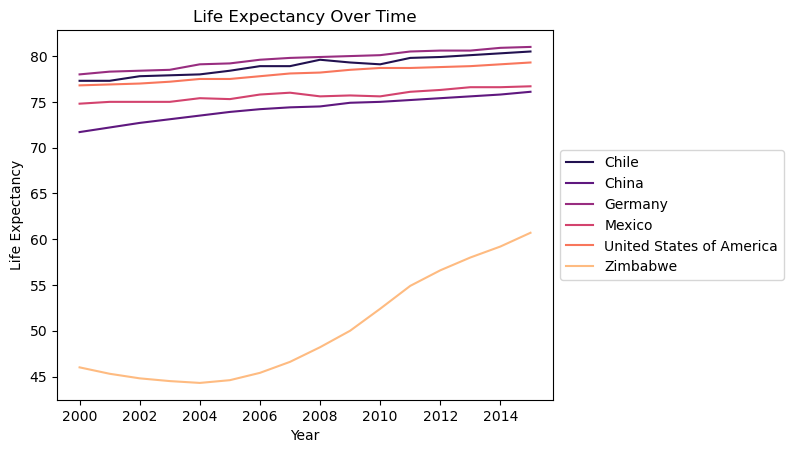

In [6]:
plt.figure()
sns.lineplot(x='Year', y='Expectancy', data=all_data, hue=all_data.Country, palette='magma')


plt.ylabel("Life Expectancy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Life Expectancy Over Time")
plt.show()

#### Between 2000 and 2014, there has been a steady rise in the life expectancy of residents across the six countries included, with Zimbabwe having a very significant rise in life expectancy after 2006.

### How has GDP increased over time in the six nations included in this dataset?

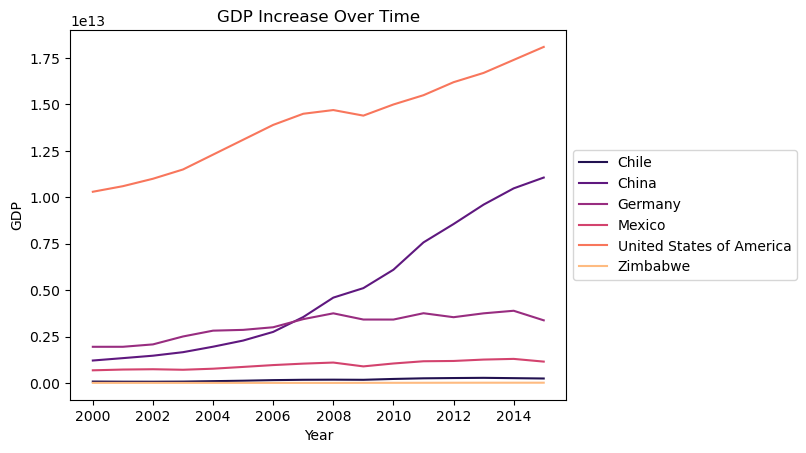

In [7]:
plt.figure()
sns.lineplot(x='Year', y='GDP', data=all_data, hue=all_data.Country, palette='magma')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("GDP Increase Over Time")
plt.show()

#### Similar to life expectancy, GDP has shown improvement since 2000 for the six countries. But both Germany and Mexico has seen a slight drop in GDP since the start of 2014.

### What is relationship between GDP and Life Expectancy?

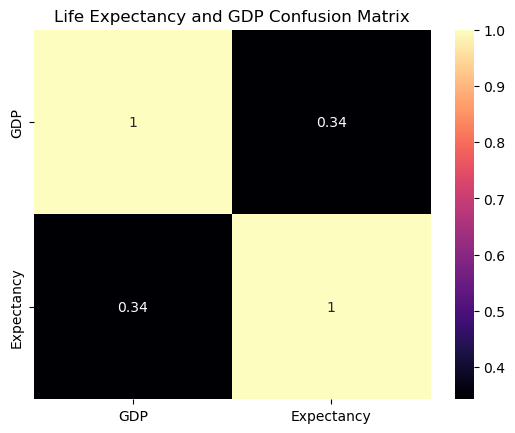

In [8]:
lifeexp_gdp = all_data[['GDP', 'Expectancy']].corr()
plt.figure()
sns.heatmap(lifeexp_gdp, annot=True, cmap='magma')

plt.title('Life Expectancy and GDP Confusion Matrix')
plt.show()

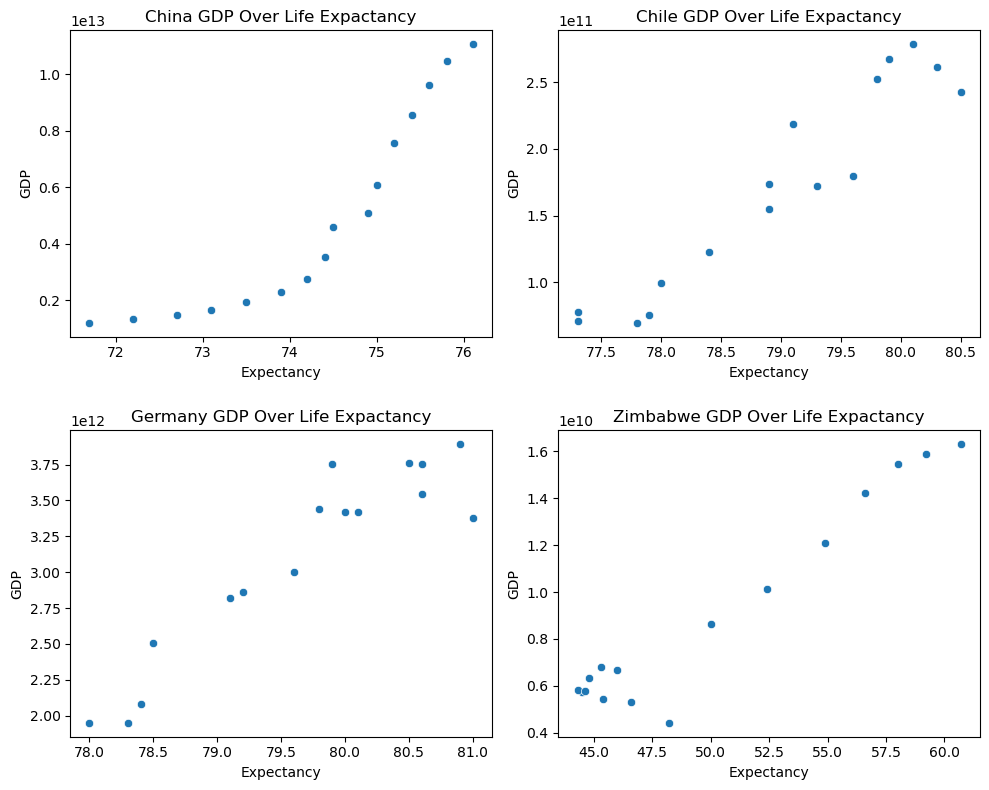

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x='Expectancy', y='GDP', data=all_data[all_data.Country == 'China'])
plt.title("China GDP Over Life Expactancy")

plt.subplot(2, 2, 2)
sns.scatterplot(x='Expectancy', y='GDP', data=all_data[all_data.Country == 'Chile'])
plt.title("Chile GDP Over Life Expactancy")

plt.subplot(2, 2, 3)
sns.scatterplot(x='Expectancy', y='GDP', data=all_data[all_data.Country == 'Germany'])
plt.title("Germany GDP Over Life Expactancy")

plt.subplot(2, 2, 4)
sns.scatterplot(x='Expectancy', y='GDP', data=all_data[all_data.Country == 'Zimbabwe'])
plt.title("Zimbabwe GDP Over Life Expactancy")

plt.tight_layout()
plt.show()
plt.clf()


#### The visualizations above indicate that life expectancy has a positive correlation with GDP, with a steady increase in the life expectancy of a country as it's GDP goes up.

### What is the average life expectancy of the included countries in the dataset?

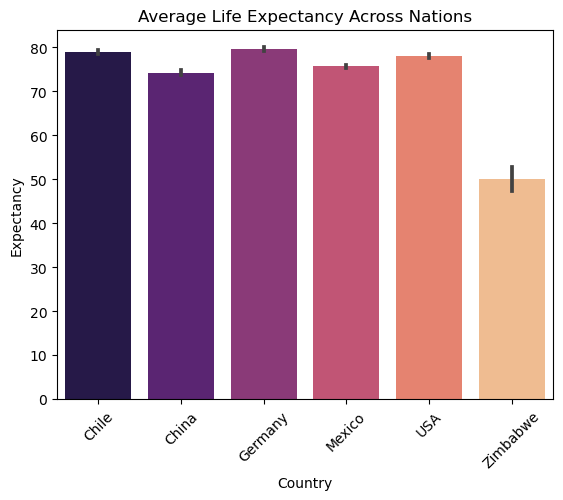

/Users/misanmeggison/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/misanmeggison/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Year          2.007500e+03
Expectancy    5.009375e+01
GDP           9.062580e+09
dtype: float64

In [20]:
plt.figure()

ax = plt.subplot()
sns.barplot(x='Country', y='Expectancy', data=all_data, palette= 'magma')

plt.xticks(rotation=45)
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
ax.set_title("Average Life Expectancy Across Nations")
plt.show()
np.mean(all_data[all_data.Country == 'Zimbabwe'])

#### Zimbabwe has the lowest average life expectancy across the six countries by a significant margin (approximately 50.1), and Germany having the highest life expectancy (approximately 80.0)

### What is the average GDP of the included countries in the dataset?

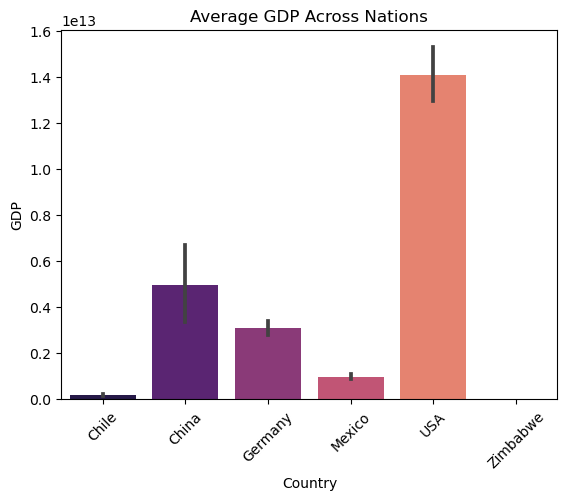

In [86]:
plt.figure()

ax = plt.subplot()
sns.barplot(x='Country', y='GDP', data=all_data, palette= 'magma')

plt.xticks(rotation=45)
ax.set_xticklabels(['Chile', 'China', 'Germany', 'Mexico', 'USA', 'Zimbabwe'])
ax.set_title("Average GDP Across Nations")
plt.show()

#### USA has an average GDP of fourteen trillion, seventy-five billion, making it the highest GDP across the six countries by a significant margin with China as second highest average with a GDP of "four trillion, nine hundred fifty-seven billion, seven hundred fourteen million. Zimbabwe has the lowest average GDP of nine billion, sixty-two million, five hundred eighty thousand.